# Import Libraries

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


## Image to GrayScale Array

In [9]:
def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img_data = np.array(img)  # Convert to numpy array
    return img_data

image_path = "image.jpg"  # Specify the image path
img_data = load_image(image_path)


### Chaotic Sequence Generation using Logistic Map

In [19]:
def logistic_map(size, r, x0):
    chaotic_sequence = []
    x = x0
    for i in range(size):
        x = r * x * (1 - x)
        chaotic_sequence.append(x)
    return chaotic_sequence

# Parameters for the logistic map
r = 3.99  # Control parameter
x0 = 0.5  # Initial condition

# Generate chaotic sequence for the number of pixels in the image
num_pixels = img_data.shape[0] * img_data.shape[1]
chaotic_seq = logistic_map(num_pixels, r, x0)


#### Encryption

In [23]:
def scramble_image(img_data, chaotic_seq):
    # Flatten the image array and create a list of pixel indices
    flat_img = img_data.flatten()
    scrambled_img = np.zeros_like(flat_img)
    
    # Normalize the chaotic sequence to match the pixel indices
    indices = np.argsort(chaotic_seq)  # Get sorted indices based on the chaotic sequence

    # Scramble the pixels according to the chaotic sequence
    for i in range(len(flat_img)):
        scrambled_img[i] = flat_img[indices[i]]
    
    # Reshape the scrambled array back to the original image shape
    scrambled_img = scrambled_img.reshape(img_data.shape)
    return scrambled_img

scrambled_img_data = scramble_image(img_data, chaotic_seq)


### Print Encrypted Image

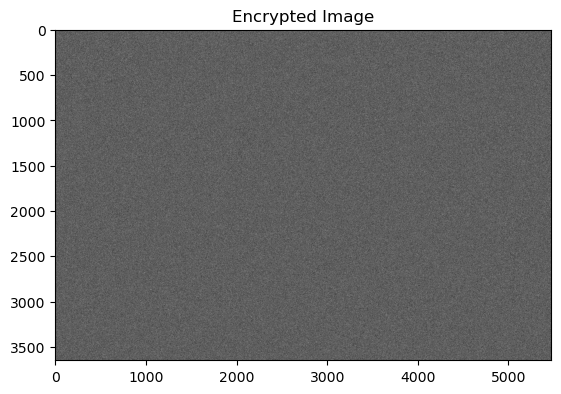

In [29]:
plt.imshow(scrambled_img_data, cmap='gray')
plt.title("Encrypted Image")
plt.show()

### Save Image

In [33]:
def save_image(image_data, save_path):
    encrypted_image = Image.fromarray(image_data.astype(np.uint8))  # Convert numpy array back to image
    encrypted_image.save(save_path)  # Save image
    print(f"Encrypted image saved as: {save_path}")

save_path = "encrypted_image.png"
save_image(scrambled_img_data, save_path)

Encrypted image saved as: encrypted_image.png
